In [1]:
%load_ext autoreload
%autoreload 2

In [63]:
from utils.data import *
from utils.gen import *
from utils.method import *
from utils.ana import *

<Axes: >

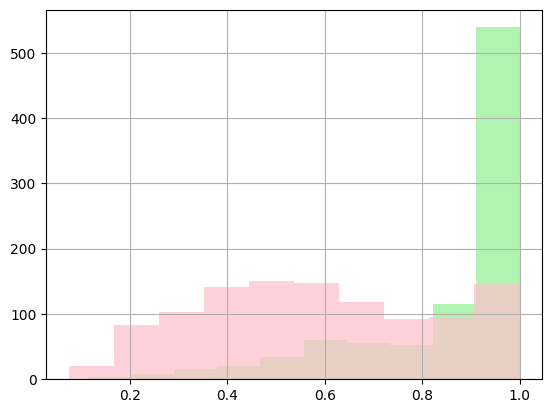

In [44]:
import pandas as pd
df=pd.read_pickle('./testdata/trivia-test_unsup_conloss_2100.pkl')
df=cal_know_unknow(df)
df=cal_probs(df)
df[df['know']==1]['pred_minprobs'].hist(color='lightgreen',alpha=0.7)
df[df['unknow']==1]['pred_minprobs'].hist(color='pink',alpha=0.7)

<Axes: >

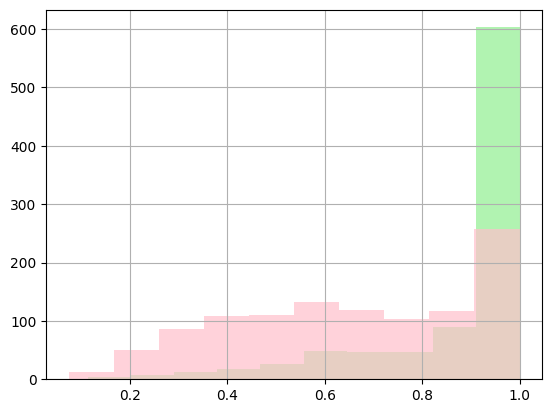

In [4]:
df[df['know']==1]['pred_fprobs'].hist(color='lightgreen',alpha=0.7)
df[df['unknow']==1]['pred_fprobs'].hist(color='pink',alpha=0.7)

<Axes: >

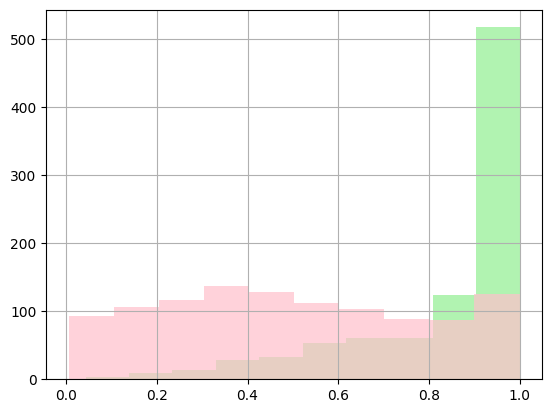

In [5]:
df[df['know']==1]['pred_prodprobs'].hist(color='lightgreen',alpha=0.7)
df[df['unknow']==1]['pred_prodprobs'].hist(color='pink',alpha=0.7)

In [ ]:
dfa=pd.read_pickle('./testdata/trivia-test_unsup_conloss_2100.pkl')
dfb=pd.read_pickle('./testdata/nq-test_unsup_conloss_2100.pkl')
dfc=pd.read_pickle('./testdata/pop-test_unsup_conloss_2100.pkl')
plot_prob_unk(dfa,dfb,dfc)

In [58]:
print(eval_honest_score('trivia-test','unsup_f_conloss',3,best_i=7))
print(eval_honest_score('nq-test','unsup_f_conloss',3,best_i=7))
print(eval_honest_score('pop-test','unsup_f_conloss',3,best_i=7))

(0.7596899224806202, 0.7383773928896992, 0.7490336576851597, 7)
(0.5301204819277109, 0.8561151079136691, 0.6931177949206899, 7)
(0.6558891454965358, 0.8685386088066369, 0.7622138771515863, 7)


In [59]:
print(eval_honest_score('trivia-test','unsup_prod_conloss',3,best_i=7))
print(eval_honest_score('nq-test','unsup_prod_conloss',3,best_i=7))
print(eval_honest_score('pop-test','unsup_prod_conloss',3,best_i=7))

(0.7906976744186046, 0.6891522333637192, 0.7399249538911619, 7)
(0.5692771084337349, 0.8279376498800959, 0.6986073791569154, 7)
(0.7713625866050808, 0.7549457562220804, 0.7631541714135806, 7)


In [61]:
print(eval_honest_score('trivia-test','unsup',1,best_i=7))
print(eval_honest_score('nq-test','unsup',1,best_i=7))
print(eval_honest_score('pop-test','unsup',1,best_i=7))

(0.7895902547065338, 0.723792160437557, 0.7566912075720453, 7)
(0.5602409638554217, 0.8237410071942446, 0.6919909855248332, 7)
(0.7297921478060047, 0.767070835992342, 0.7484314918991734, 7)


In [64]:
df=pd.read_pickle('./testdata/trivia-test_unsup_conloss_2100.pkl')
df2=pd.read_json('./data/trivia-test_preds_cons.json')
eval_cons_score(df,df2)

0.8495

In [65]:
df=pd.read_pickle('./testdata/nq-test_unsup_conloss_2100.pkl')
df2=pd.read_json('./data/nq-test_preds_cons.json')
eval_cons_score(df,df2)

0.8345

In [66]:
df=pd.read_pickle('./testdata/pop-test_unsup_conloss_2100.pkl')
df2=pd.read_json('./data/pop-test_preds_cons.json')
eval_cons_score(df,df2)

0.8755

In [85]:
df=pd.read_json('./data/trivia-test_preds.json')
df['repred']=df['pred']
df2=pd.read_json('./data/trivia-test_preds_bl.json')
eval_cons_score(df,df2)

0.534

In [84]:
df=pd.read_json('./data/nq-test_preds.json')
df['repred']=df['pred']
df2=pd.read_json('./data/nq-test_preds_bl.json')
eval_cons_score(df,df2)

0.4555

In [83]:
df=pd.read_json('./data/pop-test_preds.json')
df['repred']=df['pred']
df2=pd.read_json('./data/pop-test_preds_bl.json')
eval_cons_score(df,df2)

0.1765

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharey=False)

for i,name,sub in zip(range(3),['pred_minprobs','pred_fprobs','pred_prodprobs'],['Min-Prob','Fst-Prob','Prod-Prob']):
    correct_samples = df[df['know'] == 1][name]
    incorrect_samples = df[df['know'] == 0][name]
    n_correct, bins_correct, patches_correct = axs[i].hist(correct_samples, bins=20, alpha=0.6, label='Correct Predictions', color='#1f77b4', edgecolor='white')
    n_incorrect, bins_incorrect, patches_incorrect=axs[i].hist(incorrect_samples, bins=20, alpha=0.7, label='Incorrect Predictions', color='#ff7f0e', edgecolor='white')

    axs[i].set_xlabel(f"{sub} of Model's Predictions",fontsize=16)
    axs[i].set_ylabel('Counts',fontsize=16)
    axs[i].legend(loc='upper left',fontsize=16)
    axs[i].grid(True)
    axs[i].tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()
plt.savefig("pred_prob.pdf")
plt.show()